# Decision Tree 

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not post-pruning.



Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [7]:
print('Cancer.keys() \n{}'.format(data.keys()))

Cancer.keys() 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The dataset consists of 569 data points, with 30 features each:

In [8]:
print('Shape of data \n{}'.format(data.data.shape))

Shape of data 
(569, 30)


In [10]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(data.target_names, np.bincount(data.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


split it into a training and a test part. Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure).

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state = 42)

In [19]:
tree = DecisionTreeClassifier()

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
print('Accuracy on the training set : {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training set : 1.000
Accuracy on the test set : 0.930


The training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. 
and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data.


Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked.
Limiting the depth of the tree decreases overfitting. This leads to lower accuracy on the training set, but an improvement on the test set.

In [26]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
print('Accuracy on the training set : {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training set : 0.988
Accuracy on the test set : 0.951


### Analyzing Decision Trees

We can visua;ize the tree using the export_graphviz function from the tree module.This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:


In [33]:
from sklearn.tree import export_graphviz 
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=data.feature_names, impurity=False, filled=True) 

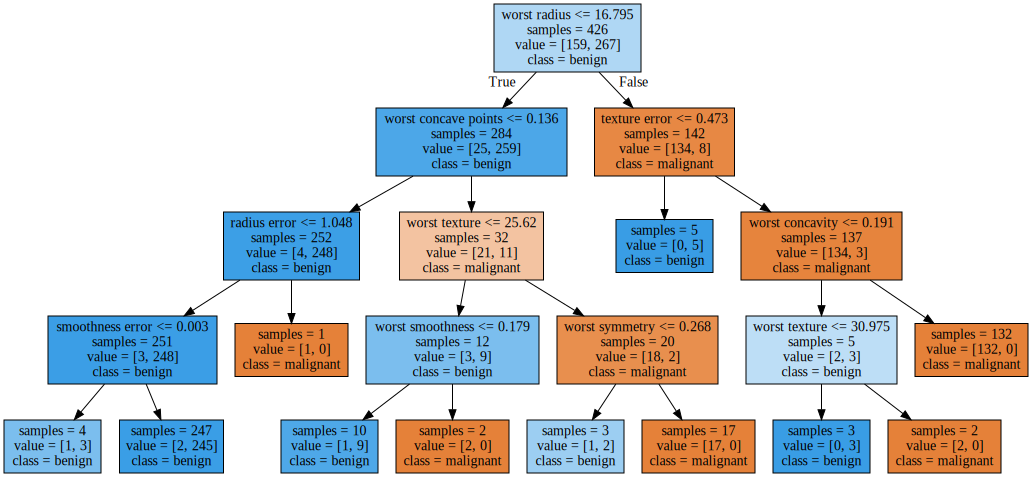

In [34]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature importance in tree

The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1.

In [37]:
print('Feature importance: \n{}'.format(tree.feature_importances_))

Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


We can visualize the feature importance.

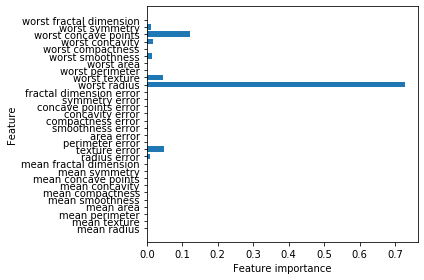

In [44]:
def plot_feature_importances_cancer(model): 
    n_features = data.data.shape[1]   
    plt.barh(range(n_features), model.feature_importances_, align='center')    
    plt.yticks(np.arange(n_features), data.feature_names)    
    plt.xlabel("Feature importance")    
    plt.ylabel("Feature")
    plt.tight_layout()
plot_feature_importances_cancer(tree)